<a href="https://colab.research.google.com/github/elenakelly/Information-Retrieval-and-Text-Mining/blob/main/Data_Set_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

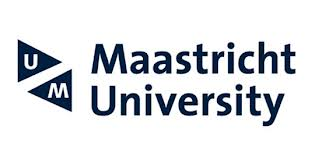
#Faculty of Science and Engineering - Department of Advanced Computer Sciences (DACS)
# Course Information Retrieval and text Mining (IRTM) - Tutorial Data Set Creation - Snorkel

By Jan Scholtes

Welcome to the tutorial using distant supervision to create more annotated data for machine learning in Information Retrieval, Text Mining and Natural Langage Processing (NLP). 

For this notebook we would need our GPU again. You can activate your GPU by clicking on Runtime, then Change runtime type and pressing GPU. If you hit the Google's GPU limits for usage, you can use other free GPU services such as Kaggle GPU's (recommended), Amazon's GPU's or Paperspace Gradient or of course your local GPU on your computer (if you have one).

# More Labeled Data for Machine Learning

Deep learning models are very data hungry. Other machine learning requires less data, but getting labeled data, especially fro domain specific applications, is a slow and expensive process. Human bias only add to the problem.

Over time, many different methods have been developed to create more labeled data for machine learning. An overview of methods is provided hereunder:

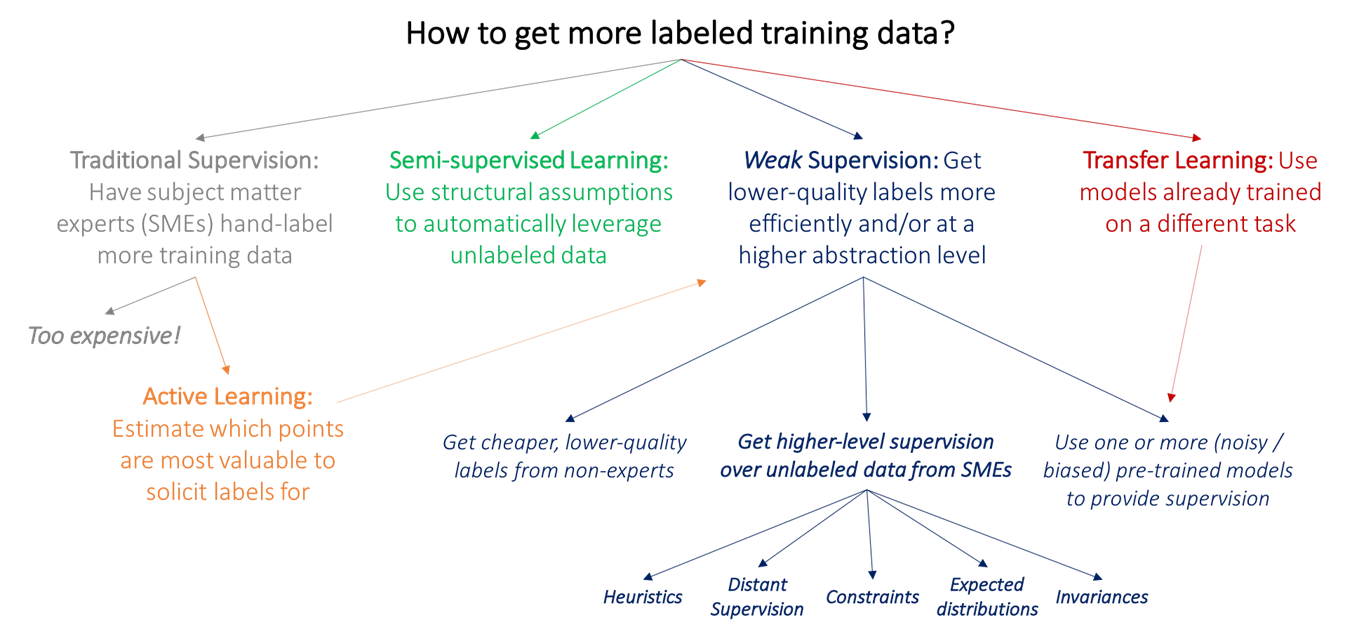

# Distant Supervision.

In this tutorial we willfocus on distant supervision methods and the Snorkel platform in particular. 

Distant supervision is a learning scheme in which a classifier is learned given a weakly labeled training set (training data is labeled automatically based on heuristics / rules).

Most machine learning techniques require a set of training data. A traditional approach for collecting training data is to have humans label a set of documents. For example, for the marriage relation, human annotators may label the pair "Bill Clinton" and "Hillary Clinton" as a positive training example. This approach is expensive in terms of both time and money, and if our corpus is large, will not yield enough data for our algorithms to work with. And because humans make errors, the resulting training data will most likely be noisy.


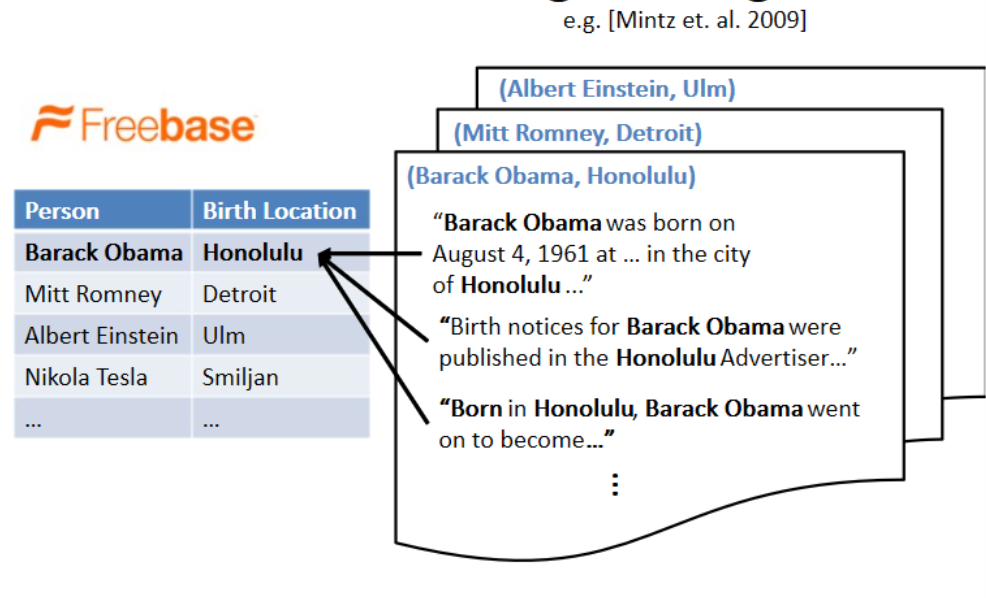


An alternative approach to generating training data is distant supervision. In distant supervision, we make use of an already existing database, such as Freebase or a domain-specific database, to collect examples for the relation we want to extract. We then use these examples to automatically generate our training data. For example, Freebase contains the fact that Barack Obama and Michelle Obama are married. We take this fact, and then label each pair of "Barack Obama" and "Michelle Obama" that appear in the same sentence as a positive example for our marriage relation. This way we can easily generate a large amount of (possibly noisy) training data. Applying distant supervision to get positive examples for a particular relation is easy, but generating negative examples is more of an art than a science.



# Snorkel

Different platforms exist, one of the is Stanford University's Snorkel. The Snorkel project started at Stanford in 2016 with a simple technical bet: that it would increasingly be the training data, not the models, algorithms, or infrastructure, that decided whether a machine learning project succeeded or failed. Given this premise, we set out to explore the radical idea that you could bring mathematical and systems structure to the messy and often entirely manual process of training data creation and management, starting by empowering users to programmatically label, build, and manage training data.

The Snorkel project is an enormous success, resulting in many peer reviewed papers on distant supervision (https://snorkel.ai/resources/research-papers/ )

Snorkel consists of 3 components: labeling functions to create "noisy' annotated data, augmentation functions to augment relevant data points and slicing functions to monitor critical subsets. We will look into all of these. 

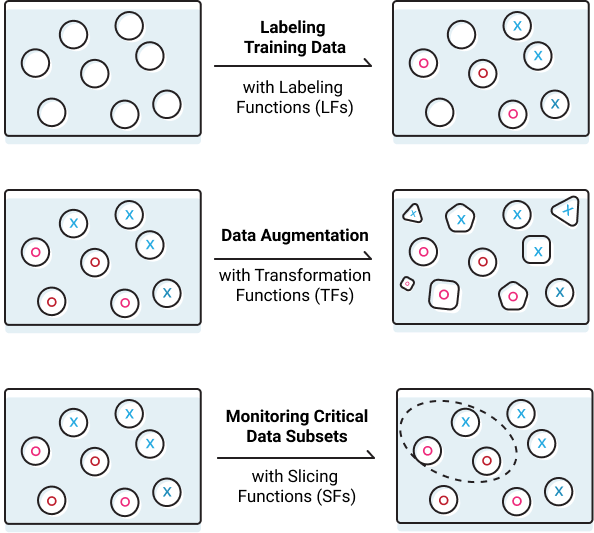

Snorkel is a system for programmatically building and managing training datasets without manual labeling. In Snorkel, users can develop large training datasets in hours or days rather than hand-labeling them over weeks or months.

Snorkel currently exposes three key programmatic operations:

**Labeling data**, e.g., using heuristic rules or distant supervision techniques

**Transforming data**, e.g., rotating or stretching images to perform data augmentation

**Slicing data** into different critical subsets for monitoring or targeted improvement

Snorkel then automatically models, cleans, and integrates the resulting training data using novel, theoretically-grounded techniques.

In this quick walkthrough, we’ll preview the high-level workflow and interfaces of Snorkel using a canonical machine learning problem: classifying spam. We’ll use a public YouTube comments dataset, and see how Snorkel can enable training a machine learning model without any hand-labeled training data! For more detailed versions of the sections in this walkthrough, see the corresponding tutorials: (Spam LFs, Spam TFs, Spam SFs).

We’ll walk through five basic steps:

1. Writing Labeling Functions (LFs): First, rather than hand-labeling any training data, we’ll programmatically label our unlabeled dataset with LFs.
2. Modeling & Combining LFs: Next, we’ll use Snorkel’s LabelModel to automatically learn the accuracies of our LFs and reweight and combine their outputs into a single, confidence-weighted training label per data point.
3. Writing Transformation Functions (TFs) for Data Augmentation: Then, we’ll augment this labeled training set by writing a simple TF.
3. Writing Slicing Functions (SFs) for Data Subset Selection: We’ll also preview writing an SF to identify a critical subset or slice of our training set.
5. Training a final ML model: Finally, we’ll train an ML model with our training set.

In the tutorials hereunder, we will use examples and resources from https://www.snorkel.org/get-started/ 




# Snorkel Tutorial 1: 

This notebook has been adapted from the spam example of the snorkel examples github. Please visit the official snorkel tutorials link for a more detailed and exhautive guide on how to use snorkel.

This notebook demonstrates how to use snorkel for data labeling. Our goal here is to build a dataset which can be used to classify if a Youtube comment is Spam or Ham.

https://colab.research.google.com/github/practical-nlp/practical-nlp/blob/master/Ch2/06_Snorkel.ipynb?authuser=0&pli=1#scrollTo=kBRUuq_poB7u 



# Snorkel Tutorial 2: 

Another Snorkel tutorial, now on text classification using noisy regular expressions:

In this notebook we will walk through a simple text classification problem that trains a complaint classifier using data from Consumer Financial Protection Bureau, showing how to use Snorkel for weak supervision.


https://colab.research.google.com/github/fastforwardlabs/snorkel-demo-colab/blob/master/snorkel_demo.ipynb#scrollTo=O2hgkWoEUODX


## Exercise 1:

1) Now use snorkel to create an annotated data set based on unlabeled data. 

You can choose the topic, LF, TF, SF and the type of classifier yourself. Explain your choise and indicate where there is room for improvement.  

The choice of sentiment analysis for movie reviews is a common task and serves as an easily understandable example. I used simple keyword matching for positive and negative sentiment in the Labeling Functions, which is a straightforward but effective way of programmatically labeling data. The third labeling function utilizes TextBlob's sentiment polarity score, which provides a more nuanced understanding of the sentiment, helping in cases where explicit positive or negative keywords may not be present. The classifier I used is Logistic Regression, a simple yet powerful linear model that works well for binary classification tasks.
While the provided labeling functions cover some simple cases, they can be further enhanced. For instance, they could be refined by including more keywords, using regular expressions, considering negations, or even incorporating more advanced natural language processing techniques. It would also be beneficial to utilize a more complex model for classification, such as Support Vector Machines, Random Forests, or even neural networks. Moreover, incorporating domain knowledge into the labeling functions or using more advanced sentiment analysis tools could significantly improve the performance. Lastly, we could also leverage Snorkel's utilities for data augmentation and slicing to further boost our classifier's performance.

In [ ]:
!pip install snorkel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 9.2 MB/s eta 0:00:00
  Using cached munkres-1.1.4-py2.py3-none-any.whl (7.0 kB)


In [ ]:
import pandas as pd
from textblob import TextBlob
from snorkel.labeling import  PandasLFApplier, labeling_function
from snorkel.labeling.model import LabelModel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline



In [ ]:
ABSTAIN = -1
POSITIVE = 1
NEGATIVE = 0

# Now let's create some dummy data
df_train = pd.DataFrame({
    'review': [
        'This movie was absolutely amazing. Loved every bit of it!',
        'Terrible movie. Will not recommend it to anyone.',
        'I liked the movie, good cinematography.',
        'The movie was the worst I have ever seen!',
    ]
})


In [ ]:
@labeling_function()
def positive(x):
    return POSITIVE if "good" in x.review.lower() or "amazing" in x.review.lower() else ABSTAIN

@labeling_function()
def negative(x):
    return NEGATIVE if "bad" in x.review.lower() or "worst" in x.review.lower() else ABSTAIN

@labeling_function()
def sentiment_analysis(x):
    return POSITIVE if TextBlob(x.review).sentiment.polarity > 0 else NEGATIVE

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression()),
])


In [ ]:
lfs = [positive, negative, sentiment_analysis]
applier = PandasLFApplier(lfs=lfs)
L_train = applier.apply(df=df_train)

label_model = LabelModel(cardinality=2, verbose=True)
label_model.fit(L_train, n_epochs=500, log_freq=100, seed=123)
df_train["label"] = label_model.predict(L=L_train, tie_break_policy="abstain")


100%|██████████| 500/500 [00:00<00:00, 1494.47epoch/s]


In [ ]:
# Filter out examples which did not get a label (where LFs abstained)
df_train_filtered = df_train[df_train.label != ABSTAIN]

# Train the classifier
pipeline.fit(df_train_filtered.review, df_train_filtered.label)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])